In [1]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from matplotlib import pyplot
import random
import cv2
import scipy

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

file_dir = "cifar-10-batches-py/"
file_names = ["data_batch_1", "data_batch_2", "data_batch_3", "data_batch_4", "data_batch_5", "test_batch"]
labels = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
data_arr, label_arr = None, None

for f in file_names:
    temp = unpickle(file_dir + f)
    data_arr  = temp[b'data'] if data_arr is None else np.concatenate((data_arr, temp[b'data']), axis = 0)
    label_arr = temp[b'labels'] if label_arr is None else np.concatenate((label_arr, temp[b'labels']), axis = 0)
cat_arr = [[] for i in range(10)]
for i in range(len(label_arr)):
    cat_arr[label_arr[i]].append(data_arr[i])
    
# print([np.asarray(cat_arr[i]).shape for i in range(10)])

mean_arr = [np.mean(temp, axis = 0, dtype = float) for temp in cat_arr]


In [2]:
#############################################################################################
#   Code for Part A below:

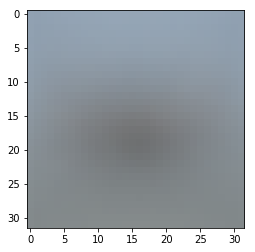

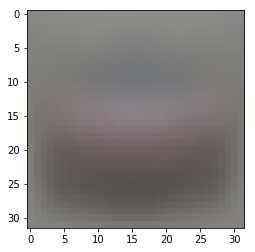

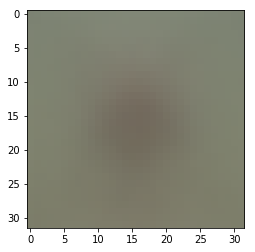

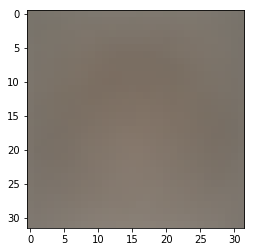

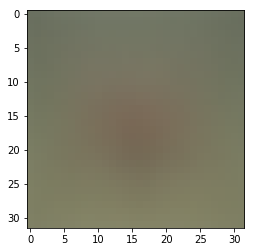

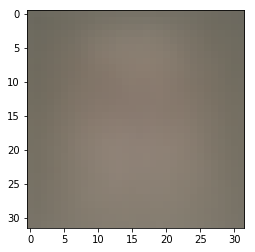

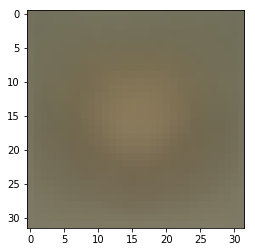

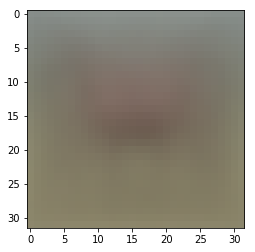

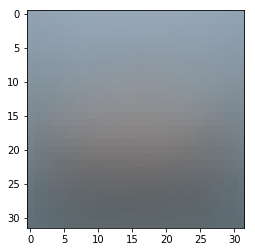

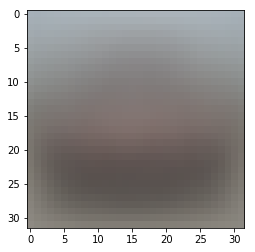

0 % Complete
10 % Complete
20 % Complete
30 % Complete
40 % Complete
50 % Complete
60 % Complete
70 % Complete
80 % Complete
90 % Complete


In [3]:
for temp in mean_arr:
    a = np.reshape(temp, (32 * 32, 3), order='F')
    a = np.reshape(a, (32, 32, 3), order='C')
    pyplot.imshow(a.astype(int))
    pyplot.show()

def A_PCA(train, mean_arr):
    t_pca = PCA()
    t_pca.fit(train - mean_arr)
    t_mat = t_pca.transform(train - mean_arr)
    return np.dot(t_mat[:, :20], t_pca.components_[:20, :]) + mean_arr

recon_img = []
for i in range(10):
    print(i*10, "% Complete")
    recon_img.append(A_PCA(cat_arr[i], mean_arr[i]))

[2620500.856609751, 3950675.838394292, 2447697.747592208, 3116478.889278504, 2180391.1584512354, 3231113.3768560463, 2630244.0658872575, 3441091.2899204837, 2440634.943571513, 4021093.9578651376]


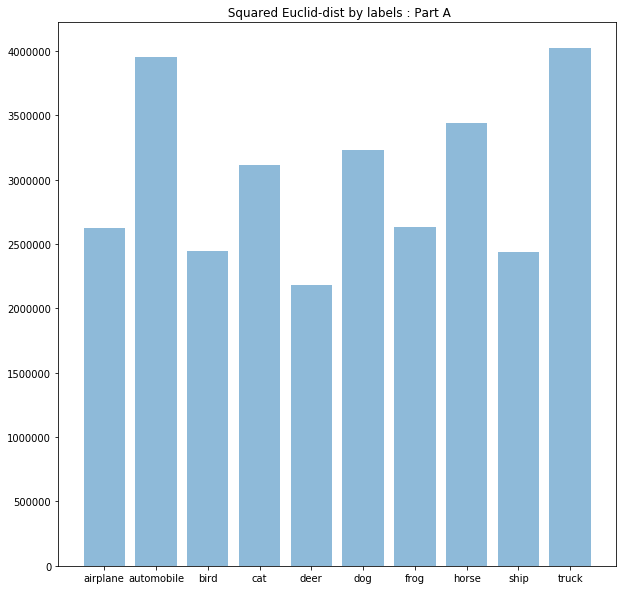

In [4]:
euclid_dist = []
for cat in range(len(recon_img)):
    holder = []
    for i in range(len(recon_img[cat])):
        holder.append(scipy.spatial.distance.euclidean(recon_img[cat][i], cat_arr[cat][i]) ** 2)
    euclid_dist.append(np.mean(holder))
print(euclid_dist)

pyplot.figure(figsize=(10,10))
pyplot.bar(np.arange(len(euclid_dist)), euclid_dist, align='center', alpha=0.5)
pyplot.xticks(np.arange(len(euclid_dist)), labels)
pyplot.ylabel('')
pyplot.title(' Squared Euclid-dist by labels : Part A')
 
pyplot.show()

In [61]:
#############################################################################################
#   Code for Part B below:

In [ ]:
#############################################################################################
#   Code for Part C below: